# Linear Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Memuat Data

In [3]:
X_train = pd.read_csv('dataset/X_train.csv')
X_test = pd.read_csv('dataset/X_test.csv')
y_train = pd.read_csv('dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('dataset/y_test.csv').values.ravel()


## Pelatihan dan Evaluasi Model

In [4]:
# Pelatihan Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluasi Model
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [5]:
metrics = {
    'Model': 'Linear Regression',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred)
}

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
metrics['CV R2 Mean'] = cv_scores.mean()
metrics['CV R2 Std'] = cv_scores.std()


## Ringkasan Hasil

In [6]:
results_df = pd.DataFrame([metrics])
print("\n=== Hasil Evaluasi Linear Regression ===")
print(results_df)


=== Hasil Evaluasi Linear Regression ===
               Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2  \
0  Linear Regression    0.27635  0.276147    0.359385   0.360927  0.870599   

   Test R2  CV R2 Mean  CV R2 Std  
0   0.8707    0.870421   0.001565  


## Visualisasi Prediksi vs Aktual

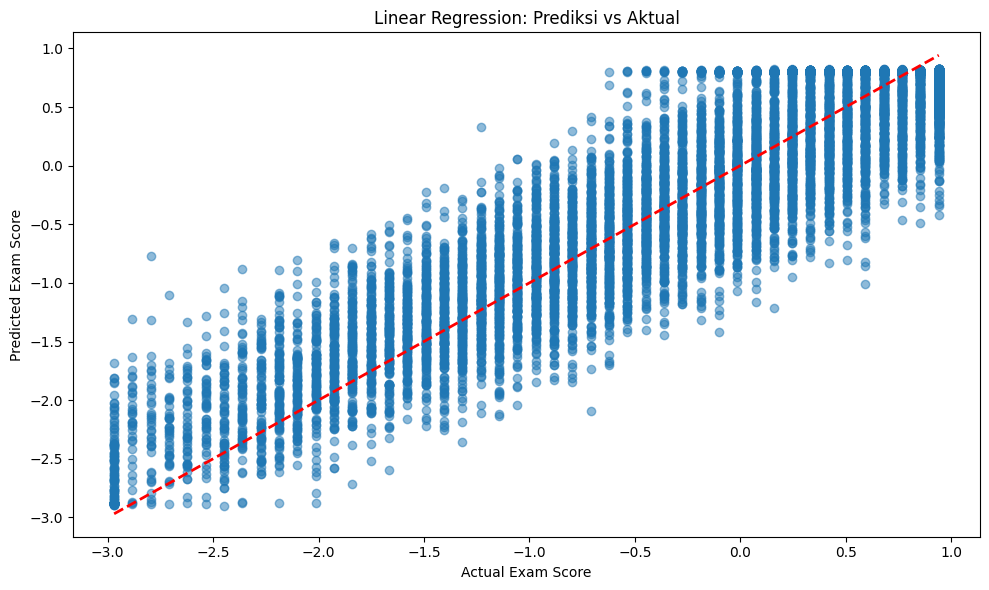

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Linear Regression: Prediksi vs Aktual')
plt.tight_layout()
plt.show()

## Visualisasi Metrik

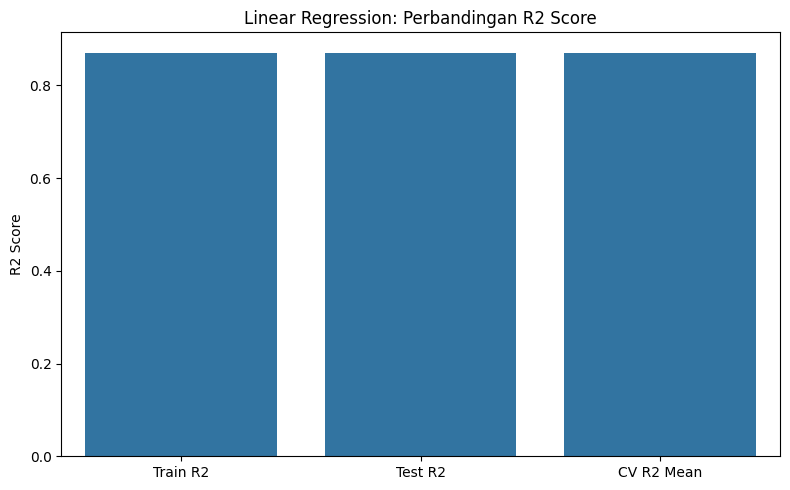

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Train R2', 'Test R2', 'CV R2 Mean'], y=[metrics['Train R2'], metrics['Test R2'], metrics['CV R2 Mean']])
plt.title('Linear Regression: Perbandingan R2 Score')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.show()

## Menyimpan Model dan Hasi

In [13]:
joblib.dump(lr_model, 'linear_regression_model.pkl')
results_df.to_csv('linear_regression_results.csv', index=False)
print("\nModel disimpan sebagai 'linear_regression_model.pkl'")
print("Hasil evaluasi disimpan sebagai 'linear_regression_results.csv'")


Model disimpan sebagai 'linear_regression_model.pkl'
Hasil evaluasi disimpan sebagai 'linear_regression_results.csv'
